<a href="https://colab.research.google.com/github/anas1IA/Windows_attack10/blob/main/Windows_attacks_10_2IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [7]:
data=pd.read_csv("Train_Test_Windows_10 (1).csv")

In [8]:
data

,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
0,0,49.07244938,0,0.779671928,0,21.830814,49.07244938,45.5788994,405.2109934,0.155934386,...,0.035543669,0.035727836,0.006138575,980725.4671,61.12065428,16125.91191,1.184788963,0.000584015,1,dos
1,17,0,0,1.170522789,0,38.15904291,0,100,0,2.41908043,...,0.071868506,0.113428645,1.38968492,695437.4911,56.84042385,17923.5993,2.403132421,0.001995776,1,dos
2,11,0,0,0.546510062,0,65.1127703,0,100,0,0.312291464,...,0.010271601,0.023255341,0.432790999,691341.4197,9.388015072,86462.6383,0.342387367,0.002475624,1,dos
3,0,0,0,0.78081667,0,68.94611198,0,100,0,1.015061671,...,0.062088903,0.070302274,0.273779061,1039903.208,81.89439351,13206.97436,2.069629418,0.000858868,1,dos
4,0,0,0,0.468739969,0,66.0142123,0,100,0,0.156246656,...,0.100304043,0.123923448,0.787313151,2498188.869,190.1717481,15214.36803,3.34346845,0.000651557,1,dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21099,0,48.02591125,0,0.234004125,0,43.52476716,48.02591125,50.0791201,147.5671891,0.15600275,...,0.001008811,0.001143588,0.004491881,11859.68944,1.297952273,14493.53846,0.033627703,0.000881077,1,mitm
21100,0,63.66271811,0,0.078245719,0,30.75056759,63.66271811,34.35184171,165.8555585,0,...,0.001484681,0.001533736,0.001635523,29946.94375,4.30663588,8477.767442,0.049489353,0.000356133,1,mitm
21101,1,82.34150729,0,0,0,15.21082955,82.34150729,16.30143536,189.6071196,0,...,0.000447637,0.000447637,0,15182.94736,1.497686568,10137.6,0.014921902,0.000298887,1,mitm
21102,0,38.79268029,0,0.156245925,0,23.04627395,38.79268029,59.84479725,172.9953291,0.156245925,...,0.000617754,0.000690462,0.002422937,12697.25717,0.899975701,17749.33333,0.020592463,0.0007672,1,mitm


In [4]:
data.shape

(21104, 126)

In [ ]:
print(data.columns)

Index(['Processor_DPC_Rate', 'Processor_pct_ Idle_Time',
       'Processor_pct_ C3_Time', 'Processor_pct_ Interrupt_Time',
       'Processor_pct_ C2_Time', 'Processor_pct_ User_Time',
       'Processor_pct_ C1_Time', 'Processor_pct_ Processor_Time',
       'Processor_C1_ransitions_sec', 'Processor_pct_ DPC_Time',
       ...
       'LogicalDisk(_Total) Avg  Disk Write Queue Length',
       'LogicalDisk(_Total) Avg  Disk Queue Length',
       'LogicalDisk(_Total) pct_ Disk Read Time',
       'LogicalDisk(_Total) Disk Write Bytes sec',
       'LogicalDisk(_Total) Disk Transfers sec',
       'LogicalDisk(_Total) Avg  Disk Bytes Transfer',
       'LogicalDisk(_Total) pct_ Disk Write Time',
       'LogicalDisk(_Total) Avg  Disk sec Transfer', 'label', 'type'],
      dtype='object', length=126)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21104 entries, 0 to 21103
Columns: 126 entries, Processor_DPC_Rate to type
dtypes: float64(5), int64(51), object(70)
memory usage: 20.3+ MB


In [ ]:
data.describe()

,Processor_DPC_Rate,Process_Pool_Paged Bytes,Process_Working_Set_ Private,Process_Working_Set_Peak,Process_Page_File Bytes,Process_Virtual_Bytes Peak,Process_Page_File Bytes Peak,Process_Private_Bytes,Process_Elapsed_Time,Process_Virtual_Bytes,...,Memory Free System Page Table Entries,Memory Available MBytes,Memory Modified Page List Bytes,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pool Paged Resident Bytes,LogicalDisk(_Total) pct_ Free Space,LogicalDisk(_Total) Current Disk Queue Length,LogicalDisk(_Total) Free Megabytes,label
count,21104.000000,2.110400e+04,2.110400e+04,2.110400e+04,2.110400e+04,2.110400e+04,2.110400e+04,2.110400e+04,21104.0,2.110400e+04,...,2.110400e+04,21104.000000,2.110400e+04,2.110400e+04,2.110400e+04,2.110400e+04,21104.000000,21104.000000,21104.000000,21104.000000
mean,5.248531,2.644860e+07,1.336076e+09,5.241378e+09,2.799167e+09,2.053073e+14,3.971298e+09,2.799167e+09,0.0,2.053058e+14,...,1.887936e+08,737.823825,1.812951e+07,4.060319e+09,1.944758e+07,9.643204e+07,82.247000,0.119409,168315.345432,0.526156
std,16.786584,5.413629e+06,5.056969e+08,8.439561e+08,9.661999e+08,5.683334e+13,1.386291e+09,9.661999e+08,0.0,5.683525e+13,...,8.514641e+08,417.262817,3.018242e+07,9.627752e+08,3.490552e+06,5.105864e+07,2.204084,0.483882,4477.907475,0.499327
min,0.000000,7.733328e+06,2.281431e+08,2.926305e+09,7.229399e+08,8.360000e+13,1.577538e+09,7.229399e+08,0.0,8.360000e+13,...,1.215598e+07,4.000000,0.000000e+00,1.194230e+09,1.638400e+07,1.077248e+07,80.369681,0.000000,164487.000000,0.000000
25%,0.000000,2.232929e+07,9.345106e+08,4.616785e+09,2.147040e+09,1.550000e+14,2.962182e+09,2.147040e+09,0.0,1.550000e+14,...,1.221032e+07,473.000000,7.233536e+06,3.489622e+09,1.807974e+07,6.821069e+07,81.315138,0.000000,166422.000000,0.000000
50%,0.000000,2.779906e+07,1.357462e+09,5.275918e+09,2.564751e+09,2.490000e+14,3.636130e+09,2.564751e+09,0.0,2.490000e+14,...,1.226051e+07,621.000000,1.250099e+07,4.106883e+09,1.817805e+07,8.878490e+07,81.714330,0.000000,167239.000000,1.000000
75%,2.000000,3.068336e+07,1.701403e+09,5.868466e+09,3.258045e+09,2.560000e+14,4.476684e+09,3.258045e+09,0.0,2.560000e+14,...,1.226337e+07,900.000000,2.145485e+07,4.572972e+09,1.916518e+07,1.281690e+08,82.097399,0.000000,168022.000000,1.000000
max,195.000000,3.806623e+07,2.849071e+09,8.300409e+09,7.340392e+09,3.050000e+14,1.320974e+10,7.340392e+09,0.0,3.050000e+14,...,4.294967e+09,2742.000000,7.029146e+08,1.303494e+10,3.464806e+07,4.146299e+08,94.611408,8.000000,193451.000000,1.000000


In [ ]:
data['type'].nunique()

8

In [ ]:
print(data['type'].unique())

['dos' 'ddos' 'injection' 'normal' 'xss' 'password' 'scanning' 'mitm']


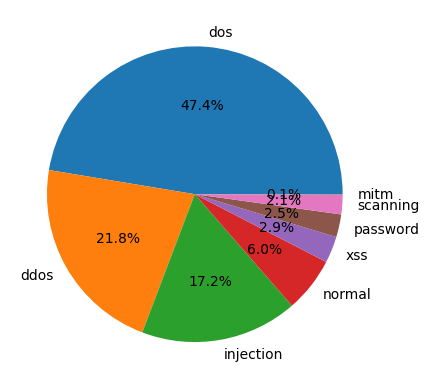

In [ ]:

plt.pie(data['type'].value_counts(), labels=data['type'].unique(), autopct='%1.1f%%')
plt.show()

In [ ]:
data['label'].nunique()

2

In [ ]:
data['label']

0        1
1        1
2        1
3        1
4        1
        ..
21099    1
21100    1
21101    1
21102    1
21103    1
Name: label, Length: 21104, dtype: int64

In [ ]:
print(data['label'].value_counts())

1    11104
0    10000
Name: label, dtype: int64


In [10]:
print(data.dtypes)

Processor_DPC_Rate                               int64
Processor_pct_ Idle_Time                        object
Processor_pct_ C3_Time                          object
Processor_pct_ Interrupt_Time                   object
Processor_pct_ C2_Time                          object
                                                 ...  
LogicalDisk(_Total) Avg  Disk Bytes Transfer    object
LogicalDisk(_Total) pct_ Disk Write Time        object
LogicalDisk(_Total) Avg  Disk sec Transfer      object
label                                            int64
type                                            object
Length: 126, dtype: object


In [12]:
categorical_columns = data.select_dtypes(include=['object']).columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Display the results
print("Categorical Columns:")
print(len(categorical_columns))

print("\nNumeric Columns:")
print(len(numeric_columns))

Categorical Columns:
70

Numeric Columns:
56


In [ ]:
data['type'].value_counts()

normal       10000
ddos          4608
password      3628
xss           1269
injection      612
dos            525
scanning       447
mitm            15
Name: type, dtype: int64

In [ ]:
data['type'].value_counts()['dos']

525

In [ ]:
target_class = "normal"
dos_cou = len(data[(data['type'] == target_class) & (data['label'] == 1)])

In [ ]:
dos_cou

0

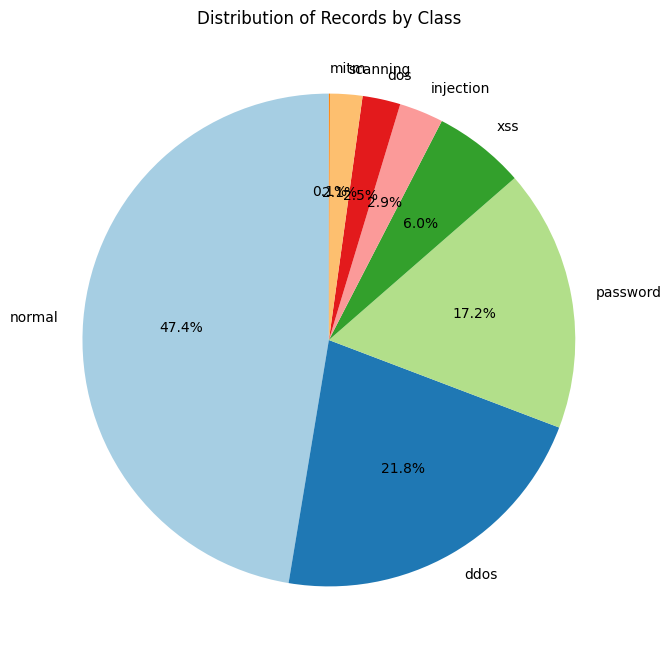

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data1 = {'type': ['normal', 'ddos', 'password', 'xss', 'injection', 'dos', 'scanning', 'mitm'],
        'count': [10000, 4608, 3628, 1269, 612, 525, 447, 15]}

df = pd.DataFrame(data1)

plt.figure(figsize=(8, 8))
plt.pie(df['count'], labels=df['type'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Records by Class')
plt.show()


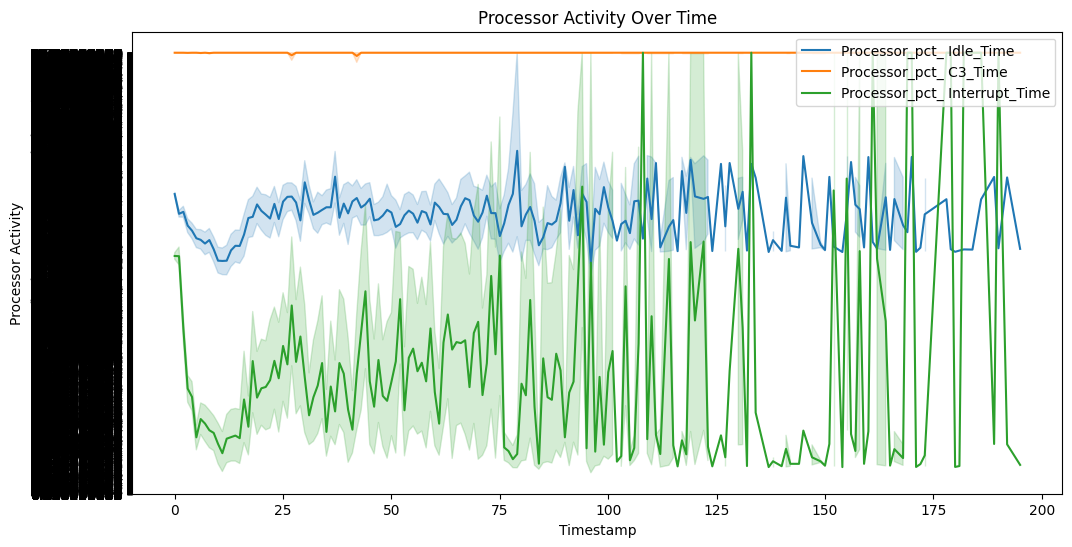

In [ ]:

# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming 'df' is your DataFrame with a 'timestamp' column
# plt.figure(figsize=(12, 6))
# for column in data.columns[1:4]:  # Assuming the first column is 'timestamp'
#     sns.lineplot(x='Processor_DPC_Rate', y=column, data=data, label=column)

# plt.xlabel('Timestamp')
# plt.ylabel('Processor Activity')
# plt.title('Processor Activity Over Time')
# plt.legend(loc='upper right')
# plt.show()



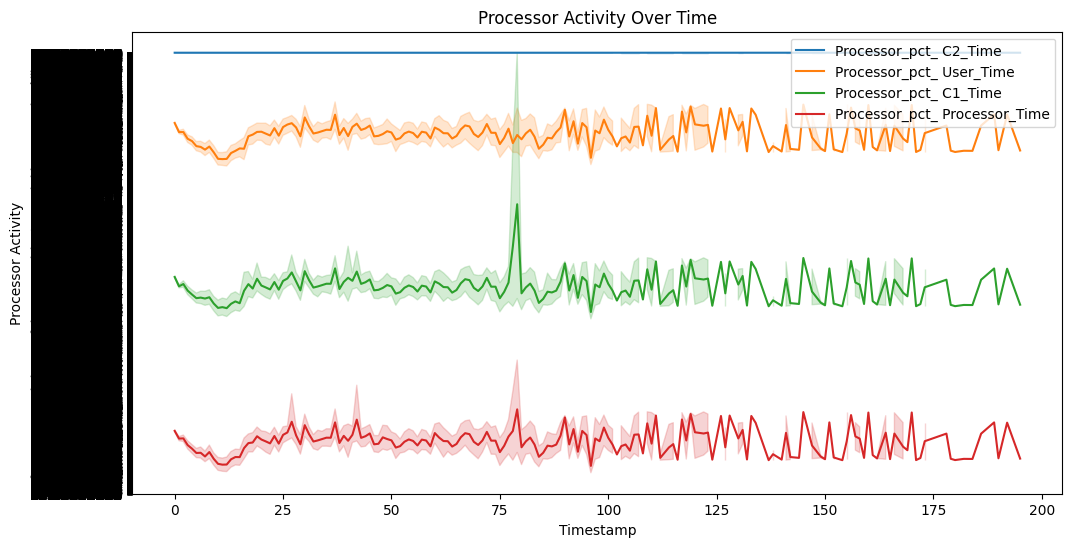

In [ ]:

# plt.figure(figsize=(12, 6))
# for column in data.columns[4:8]:  # Assuming the first column is 'timestamp'
#     sns.lineplot(x='Processor_DPC_Rate', y=column, data=data, label=column)

# plt.xlabel('Timestamp')
# plt.ylabel('Processor Activity')
# plt.title('Processor Activity Over Time')
# plt.legend(loc='upper right')
# plt.show()


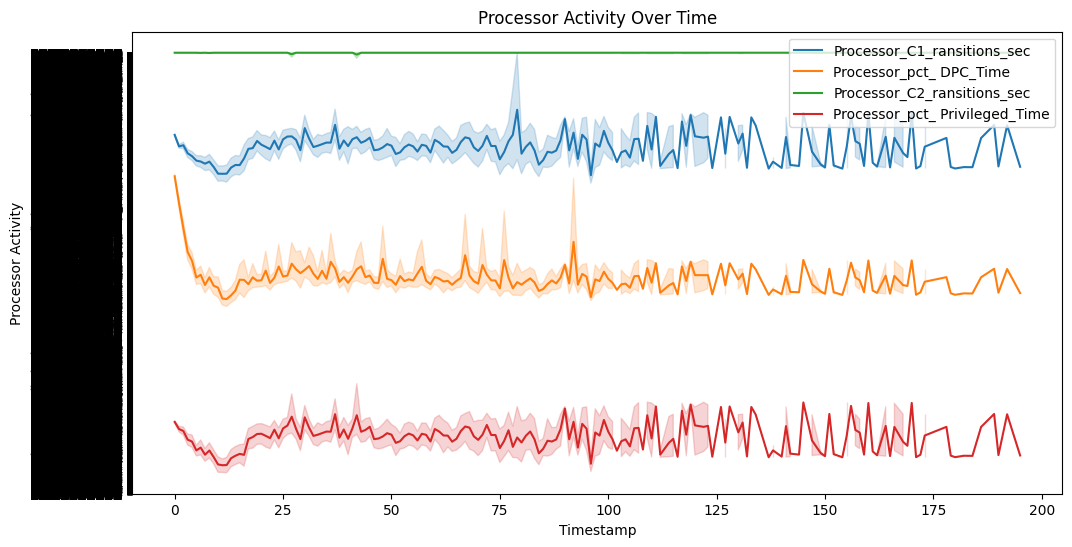

In [ ]:
# Assuming 'df' is your DataFrame with a 'timestamp' column
# plt.figure(figsize=(12, 6))
# for column in data.columns[8:12]:  # Assuming the first column is 'timestamp'
#     sns.lineplot(x='Processor_DPC_Rate', y=column, data=data, label=column)

# plt.xlabel('Timestamp')
# plt.ylabel('Processor Activity')
# plt.title('Processor Activity Over Time')
# plt.legend(loc='upper right')
# plt.show()

In [7]:
# Assuming 'df' is your DataFrame with a 'timestamp' column
# plt.figure(figsize=(12, 6))
# for column in data.columns[12:16]:  # Assuming the first column is 'timestamp'
#     sns.lineplot(x='Processor_DPC_Rate', y=column, data=data, label=column)

# plt.xlabel('Timestamp')
# plt.ylabel('Processor Activity')
# plt.title('Processor Activity Over Time')
# plt.legend(loc='upper right')
# plt.show()

## missing value

After checking the dataset, it has been determined that there are no missing values present in this data

In [5]:
missing_values = data.isnull().sum()

In [6]:
print(missing_values)

Processor_DPC_Rate                              0
Processor_pct_ Idle_Time                        0
Processor_pct_ C3_Time                          0
Processor_pct_ Interrupt_Time                   0
Processor_pct_ C2_Time                          0
                                               ..
LogicalDisk(_Total) Avg  Disk Bytes Transfer    0
LogicalDisk(_Total) pct_ Disk Write Time        0
LogicalDisk(_Total) Avg  Disk sec Transfer      0
label                                           0
type                                            0
Length: 126, dtype: int64


## Normmalization and standarzation


---



In [9]:
data_copy_Normalization=data.copy()

In [10]:
numeric_columns = data_copy_Normalization.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
data_copy_Normalization[numeric_columns] = scaler.fit_transform(data_copy_Normalization[numeric_columns])

In [11]:
data_copy_Normalization.describe()

,Processor_DPC_Rate,Process_Pool_Paged Bytes,Process_Working_Set_ Private,Process_Working_Set_Peak,Process_Page_File Bytes,Process_Virtual_Bytes Peak,Process_Page_File Bytes Peak,Process_Private_Bytes,Process_Elapsed_Time,Process_Virtual_Bytes,...,Memory Free System Page Table Entries,Memory Available MBytes,Memory Modified Page List Bytes,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pool Paged Resident Bytes,LogicalDisk(_Total) pct_ Free Space,LogicalDisk(_Total) Current Disk Queue Length,LogicalDisk(_Total) Free Megabytes,label
count,21104.000000,21104.000000,21104.000000,21104.000000,21104.000000,21104.000000,21104.000000,21104.000000,21104.0,21104.000000,...,21104.000000,21104.000000,21104.000000,21104.000000,21104.000000,21104.000000,21104.000000,21104.000000,21104.000000,21104.000000
mean,0.026916,0.616996,0.422725,0.430783,0.313750,0.549717,0.205787,0.313750,0.0,0.549710,...,0.041243,0.268015,0.025792,0.242054,0.167738,0.212103,0.131818,0.014926,0.132176,0.526156
std,0.086085,0.178474,0.192946,0.157041,0.146008,0.256700,0.119177,0.146008,0.0,0.256708,...,0.198810,0.152397,0.042939,0.081311,0.191116,0.126427,0.154762,0.060485,0.154603,0.499327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.481192,0.269510,0.314560,0.215204,0.322493,0.119035,0.215204,0.0,0.322493,...,0.000013,0.171293,0.010291,0.193856,0.092846,0.142224,0.066386,0.000000,0.066807,0.000000
50%,0.000000,0.661517,0.430885,0.437210,0.278326,0.747064,0.176974,0.278326,0.0,0.747064,...,0.000024,0.225347,0.017785,0.245986,0.098228,0.193168,0.094416,0.000000,0.095015,1.000000
75%,0.010256,0.756605,0.562114,0.547470,0.383094,0.778681,0.249234,0.383094,0.0,0.778681,...,0.000025,0.327246,0.030523,0.285350,0.152276,0.290688,0.121314,0.000000,0.122048,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
data_copy_standarzation=data.copy()

In [21]:
numeric_columns = data_copy_standarzation.select_dtypes(include=['number']).columns
scaler = StandardScaler()
data_copy_standarzation[numeric_columns] = scaler.fit_transform(data_copy_standarzation[numeric_columns])

In [23]:
data_copy_standarzation.describe()

,Processor_DPC_Rate,Process_Pool_Paged Bytes,Process_Working_Set_ Private,Process_Working_Set_Peak,Process_Page_File Bytes,Process_Virtual_Bytes Peak,Process_Page_File Bytes Peak,Process_Private_Bytes,Process_Elapsed_Time,Process_Virtual_Bytes,...,Memory Free System Page Table Entries,Memory Available MBytes,Memory Modified Page List Bytes,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pool Paged Resident Bytes,LogicalDisk(_Total) pct_ Free Space,LogicalDisk(_Total) Current Disk Queue Length,LogicalDisk(_Total) Free Megabytes,label
count,2.110400e+04,2.110400e+04,2.110400e+04,21104.000000,2.110400e+04,2.110400e+04,2.110400e+04,2.110400e+04,21104.0,2.110400e+04,...,2.110400e+04,2.110400e+04,2.110400e+04,2.110400e+04,2.110400e+04,2.110400e+04,2.110400e+04,2.110400e+04,2.110400e+04,2.110400e+04
mean,3.232188e-17,-3.232188e-16,-4.309584e-17,0.000000,2.262532e-16,-1.723834e-16,-4.309584e-17,2.262532e-16,0.0,1.292875e-16,...,-4.848283e-17,-1.077396e-16,-4.578933e-17,-2.154792e-17,-3.663147e-16,-1.292875e-16,-1.723834e-15,7.003075e-17,-3.232188e-15,2.154792e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,0.0,1.000024e+00,...,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-3.126697e-01,-3.457148e+00,-2.190954e+00,-2.743185,-2.148910e+00,-2.141527e+00,-1.726779e+00,-2.148910e+00,0.0,-2.141430e+00,...,-2.074566e-01,-1.758703e+00,-6.006789e-01,-2.976974e+00,-8.776976e-01,-1.677710e+00,-8.517660e-01,-2.467782e-01,-8.549610e-01,-1.053755e+00
25%,-3.126697e-01,-7.609337e-01,-7.941011e-01,-0.740096,-6.749558e-01,-8.851926e-01,-7.279427e-01,-6.749558e-01,0.0,-8.851378e-01,...,-2.073928e-01,-6.346842e-01,-3.610127e-01,-5.927762e-01,-3.918763e-01,-5.527374e-01,-4.227991e-01,-2.467782e-01,-4.228293e-01,-1.053755e+00
50%,-3.126697e-01,2.494609e-01,4.229102e-02,0.040927,-2.426219e-01,7.688054e-01,-2.417795e-01,-2.426219e-01,0.0,7.688045e-01,...,-2.073338e-01,-2.799832e-01,-1.864879e-01,4.836594e-02,-3.637128e-01,-1.497753e-01,-2.416797e-01,-2.467782e-01,-2.403736e-01,9.489870e-01
75%,-1.935241e-01,7.822584e-01,7.224400e-01,0.743051,4.749424e-01,8.919755e-01,3.645684e-01,4.749424e-01,0.0,8.919704e-01,...,-2.073305e-01,3.886759e-01,1.101772e-01,5.324873e-01,-8.090376e-02,6.215927e-01,-6.787609e-02,-2.467782e-01,-6.551104e-02,9.489870e-01
max,1.130403e+01,2.146047e+00,2.991973e+00,3.624718,4.700200e+00,1.754166e+00,6.664305e+00,4.700200e+00,0.0,1.754132e+00,...,4.822600e+00,4.803264e+00,2.268875e+01,9.321836e+00,4.354856e+00,6.232156e+00,5.609905e+00,1.628658e+01,5.613392e+00,9.489870e-01
